# Exploratory Data Analysis (EDA) on Haberman Survival Data

<h3>Haberman Survival Dataset</h3>

Infomation from https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

The Dataset contains acitivity on survival of patients who had undergone surgery for breast cancer
It contains record from year 1958 to 1970 by University of Chicago's Billings Hospital


There are four features:

Age of patient at the time of operation(age)

Patient’s year of operation(year)

Number of positive axillary nodes detected(nodes)

Survival status (Class Attribute):

1 = the patient survived 5 years or longer

2 = the patient died within 5 years

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hm=pd.read_csv('F:\Applied AI Course\Datasets\haberman.csv')

In [4]:
# First five rows of the dataset
hm.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
# To determine about columns name,no of rows,missing values,type of column
hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB



1.The dataset contains 4 columns (age,year,nodes,status)

2.There are no missing values

3.The status column has 2 values 0 and 1 , we can map the value 1 ="Yes" and 2 ="No" as categorical type

In [6]:
# how many data-points and features?
hm.shape

(306, 4)

There are 306 data points and 4 features

In [7]:
# Change the integer value of status to Categorical value i.e. 1="Yes" ad 2="NO"
hm['status']=hm['status'].map({1:"Yes",2:"No"})
hm.head()

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [8]:
# Find whether the Dataset is Balanced or not?
hm['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

The Haberman Survival Dataset is Imbalanced as the no of data points for both the class is different

1."Yes" means the patients survive 5 yeras or longer which is 225 out of 306

2."No" means The patient died within 5 years which is 81 out of 306

<h2>1-D Scatter Plot </h2>

In [9]:
hb_yes = hm.loc[hm["status"] == "Yes"]
hb_no = hm.loc[hm["status"] == "No"]

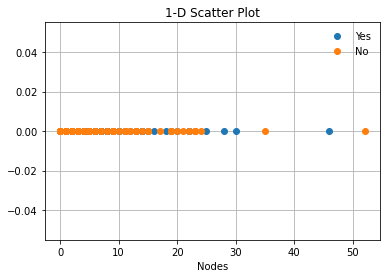

In [18]:
plt.plot(hb_yes["nodes"], np.zeros_like(hb_yes["nodes"]), 'o',label='Yes')
plt.plot(hb_no["nodes"], np.zeros_like(hb_no["nodes"]), 'o',label='No')
plt.title("1-D Scatter Plot")
plt.legend()
plt.xlabel('Nodes') 
plt.legend(loc='upper right', frameon=False)
plt.grid()
plt.show()

The data of short survival status are mostly overlap on long survival status due to which we will not be able to conclude on this data.

<h3>Pair-Plot</h3>

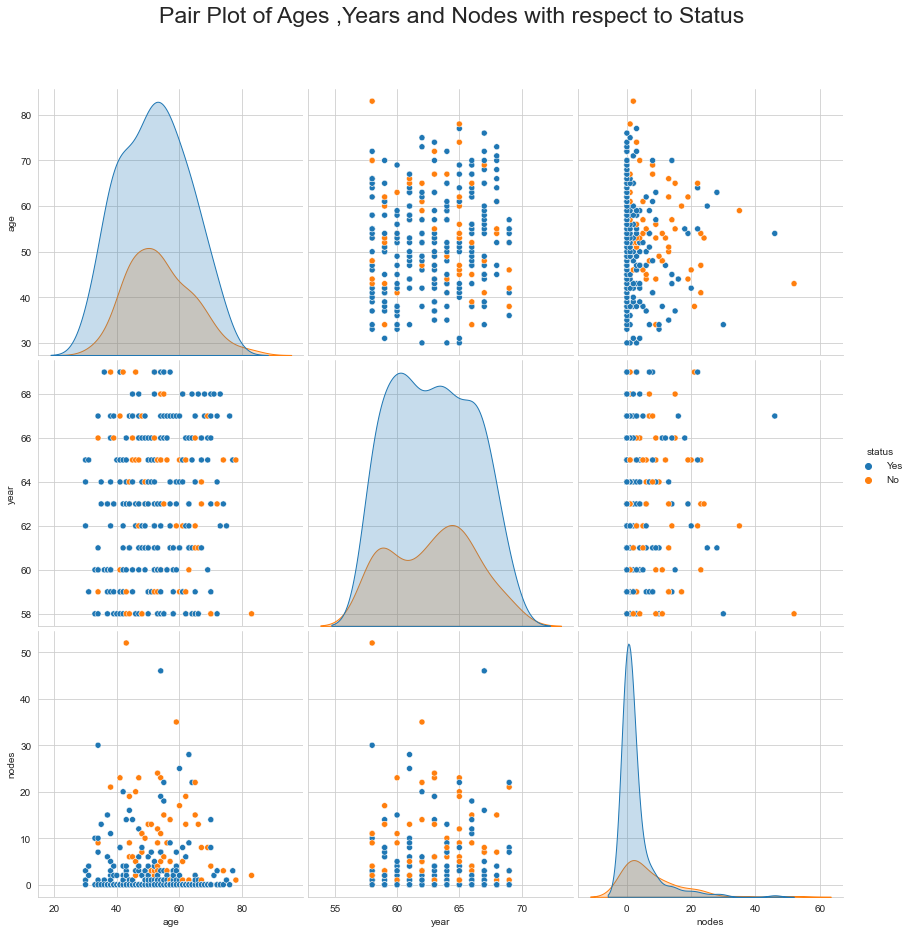

In [52]:
sns.set_style("whitegrid")

sns.pairplot(hm,hue="status",height=4)
plt.suptitle('Pair Plot of Ages ,Years and Nodes with respect to Status', size = 23,y=1.08);
plt.show()

<h3>Observation</h3>

1. "age" and "nodes" are the most useful features to identify survival rates
2. The patient having auxillary node 0 or 1 and age 30-40 is more likely to survive
3. As years of operation is increasing the success rate of survival is also increasing

<h3>Probability Density Function (PDF)</h3>

C:\Users\lucifer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucifer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


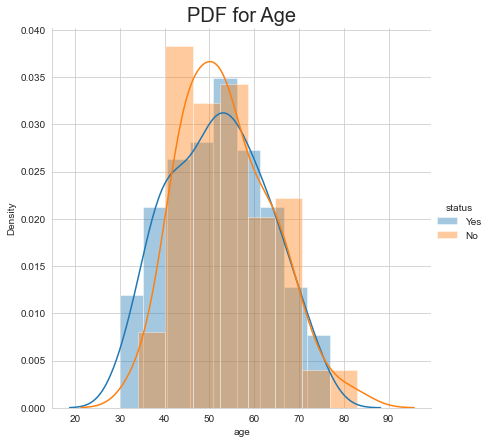

In [61]:
# which is among the 4 features is much better than the other variables to distinguish class?

#  Distplot for Age

sns.FacetGrid(hm,hue="status",height=6)\
   .map(sns.distplot,"age")\
   .add_legend()
plt.ylabel("Density")
plt.title("PDF for Age",size=20,y=1)
plt.show()

<h2>Observation</h3>

1. The histogram is overlapped which says that survival rate does not totally depend upon age
2. However,The patient having age 30-40 is more likely to survive whereas 40-70 has 
   less chance of survival and patient above 70 has almost same rate of survival and death

C:\Users\lucifer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucifer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


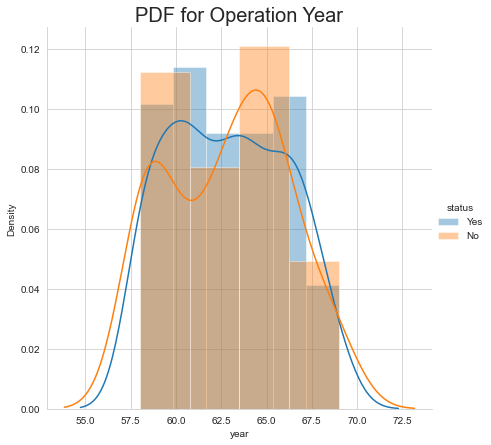

In [64]:
# Distplot for Year
sns.FacetGrid(hm,hue="status",height=6)\
   .map(sns.distplot,"year")\
   .add_legend()
plt.ylabel("Density")
plt.title("PDF for Operation Year",size=20,y=1)
plt.show()

<h3>Observations</h3>

The data is heavily overlapped and clearly, we cannot find out the survival rate using the year of operations

C:\Users\lucifer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucifer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


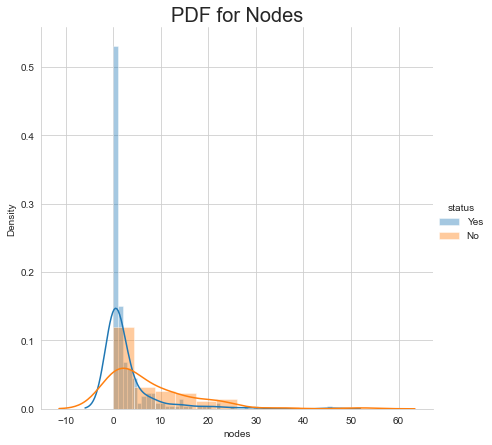

In [63]:
# Distplot for Nodes

sns.FacetGrid(hm,hue="status",height=6)\
   .map(sns.distplot,"nodes")\
   .add_legend()
plt.ylabel("Density")
plt.title("PDF for Nodes",size=20,y=1)
plt.show()

<h3>Observatons</h3>

1. The patients having 0 or 1 auxillary nodes has the higher rate of survival
2. The patients having more than 22 auxillary nodes has very less chances of survival

<h3>Cumulative Distribution Function (CDF)</h3>

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ] 

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


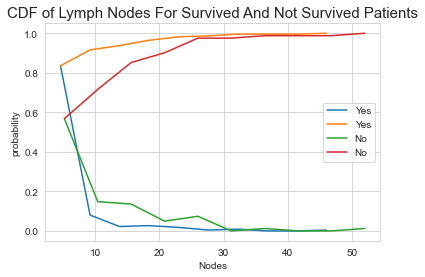

In [67]:
status_yes= hm.loc[hm["status"] == "Yes"]
status_no= hm.loc[hm["status"] == "No"]
counts, bin_edges = np.histogram(status_yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges,"\n");
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Yes")
plt.plot(bin_edges[1:], cdf,label="Yes")


counts1, bin_edges1 = np.histogram(status_no['nodes'], bins=10, 
                                 density = True)
pdf = counts1/(sum(counts1))
print(pdf);
print(bin_edges1);
cdf = np.cumsum(pdf)
plt.plot(bin_edges1[1:],pdf,label="No")
plt.plot(bin_edges1[1:], cdf,label="No")
plt.xlabel("Nodes")
plt.ylabel("probability")
plt.title("CDF of Lymph Nodes For Survived And Not Survived Patients",size=15)
plt.legend()
plt.show()

<h3>Observations</h3>

 1. 83.55% of patients who has survived contains nodes 0 or 1 
 2. The patient who has nodes more than 25 are very less likely to survive

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ] 

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


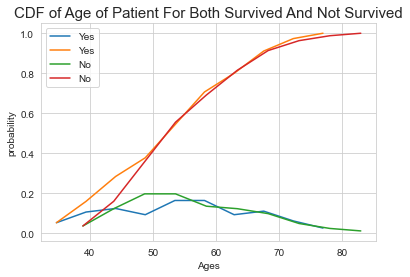

In [68]:
counts, bin_edges = np.histogram(status_yes['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges,"\n");
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="Yes")
plt.plot(bin_edges[1:], cdf,label="Yes")


counts1, bin_edges1 = np.histogram(status_no['age'], bins=10, 
                                 density = True)
pdf = counts1/(sum(counts1))
print(pdf);
print(bin_edges1);
cdf = np.cumsum(pdf)
plt.plot(bin_edges1[1:],pdf,label="No")
plt.plot(bin_edges1[1:], cdf,label="No")
plt.xlabel("Ages")
plt.ylabel("probability")
plt.title("CDF of Age of Patient For Both Survived And Not Survived",size=15)
plt.legend()
plt.show()

<h3>Observations</h3>

1. The patients who has survived are more likely to have age 30-40
2. The patients having age more than 75 has very few chances of survive

<h2>2-D Scatter Plot</h2>

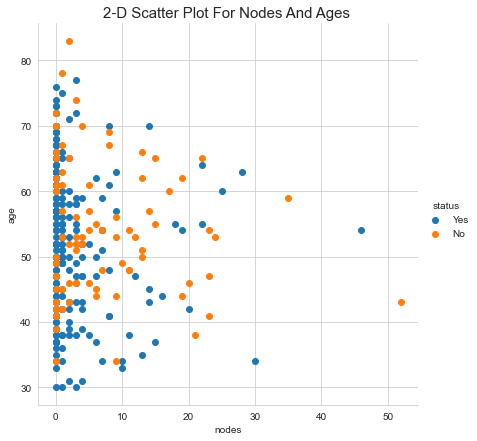

In [71]:
# 2-D Scatter plot with color-coding for each type/class.
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="status", height=6) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();

plt.title("2-D Scatter Plot For Nodes And Ages ",size=15,y=1)
plt.show()

<h3>Observations</h3>

1. More blue points can be seen below node 10
2. The patients having age 30-40 and nodes 0 or 1 are more likely to survive
3. Most of the patients have nodes less than 25
4. More than 10 nodes patients are very less likely to survive specially with age more than 45

<h3>Mean , Variance and Std-Deviation </h3>

In [108]:
print("-----Mean-----")
print("The mean of nodes having status as Yes =",np.mean(hb_yes["nodes"]))
print("The mean of nodes having status as No =",np.mean(hb_no["nodes"]))

# Mean with outlier
print("The mean of nodes with an outlier having status as Yes =",np.mean(np.append(hb_yes["nodes"],50)))

print("\n")

# Std-deviation
print("-----Std-Deviation-----")
print("The std-dev of nodes having status as Yes =",np.std(hb_yes['nodes']))
print("The std-dev of nodes having status as No =",np.std(hb_no['nodes']))
print("The std-dev of nodes with an outlier having status as Yes =",np.std(np.append(hb_yes["nodes"],50)))


-----Mean-----
The mean of nodes having status as Yes = 2.7911111111111113
The mean of nodes having status as No = 7.45679012345679
The mean of nodes with an outlier having status as Yes = 3.0


-----Std-Deviation-----
The std-dev of nodes having status as Yes = 5.857258449412131
The std-dev of nodes having status as No = 9.128776076761632
The std-dev of nodes with an outlier having status as Yes = 6.6312480972614525


<h3>Median, Percentile, Quantile, IQR, MAD</h3>

In [109]:
print("Median, Percentile, Quantile, IQR, MAD with respect to nodes ")
print('-----Median-----')
print(np.median(hb_yes['nodes']))
print(np.median(hb_no['nodes']))

print("\nQuantiles:")
print(np.percentile(hb_yes['nodes'],np.arange(0, 100, 25)))
print(np.percentile(hb_no['nodes'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hb_yes['nodes'],90))
print(np.percentile(hb_no['nodes'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hb_yes['nodes']))
print(robust.mad(hb_no['nodes']))

Median, Percentile, Quantile, IQR, MAD with respect to nodes 
-----Median-----
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


In [110]:
print("Median, Percentile, Quantile, IQR, MAD with respect to age ")
print('-----Median-----')
print(np.median(hb_yes['age']))
print(np.median(hb_no['age']))

print("\nQuantiles:")
print(np.percentile(hb_yes['age'],np.arange(0, 100, 25)))
print(np.percentile(hb_no['age'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(hb_yes['age'],90))
print(np.percentile(hb_no['age'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hb_yes['age']))
print(robust.mad(hb_no['age']))

Median, Percentile, Quantile, IQR, MAD with respect to age 
-----Median-----
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


<h3>Box plot and Whiskers</h3>

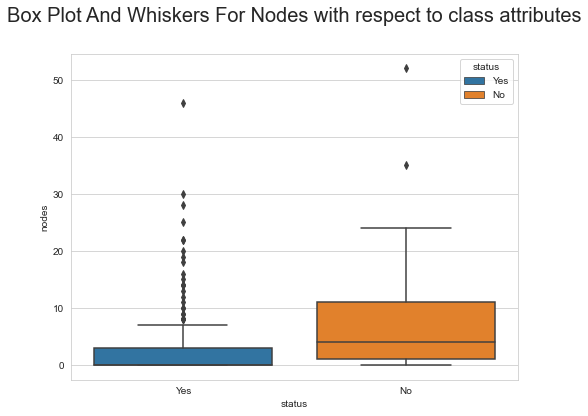

In [112]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='status',y='nodes',hue="status",dodge=False,data=hm,ax=ax)
plt.title("Box Plot And Whiskers For Nodes with respect to class attributes",size=20,y=1.08)
plt.show()

<h3>Observations</h3>

IN the plot , a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot do not correposnd to the min and max values.

1. we can observe that 25th percentile and 50th percentile are nearly same for survived patients and threshold for it is 0 to 7.

2. For short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2.There are most of point above 12 lies in Short survival.

So,If Node is between 0–7 then there is chances of having 50% error for Short survival status as short survival(No) plot's 50th percentile nearly lies within same range as survived(Yes) 75th percentile.

<h3>Violin Plot </h3>

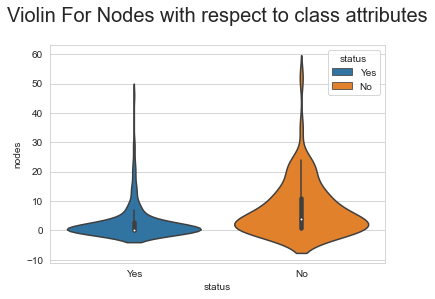

In [123]:
sns.violinplot(x="status", y="nodes",hue="status",dodge=False,data=hm, size=20)
plt.title("Violin For Nodes with respect to class attributes",size=20,y=1.08)
plt.show()

<h3>Observations</h3>

 Denser regions of the data are fatter, and sparser ones thinner in a violin plot

1. For survival patient violin plot, Node 0 region is more denser and the whisker is in range 0-7.

2. For patients having less survival rate , denser region is between 0-20 and the whisker is in range 0-12.

<h3> Countour Plot</h3>

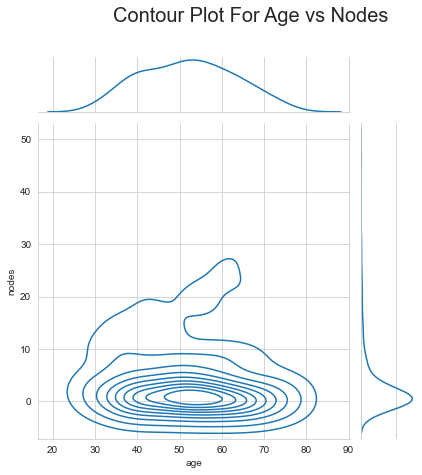

In [134]:
sns.jointplot(x="age", y="nodes", data=hb_yes, kind="kde")
plt.grid()
plt.title("Contour Plot For Age vs Nodes",size=20,y=1.30,horizontalalignment="right")
plt.show();

<h3>Observations</h3>

The color in the 2-D plot which is denser or darker in the middle or over where there is more population of points(density). 
It is called Contour probability density plot. we can see it as the hill where top of the hill contains maximum density of points and it decreases as the hill slope decreases

1. The survival rate of patient having node 0-3 and age 45-60 is high as it is observed that density of point is more.

2. As the density points decreases we can say that the survival rate is quite low

<h2>Conclusion</h3>

1. Survival of the patient depends upon nodes whereas age and year features are less likely to conclude the patient's survival.

2. Chances of survival of patients having higher node is less but we cannot conclude that the patient having node o or less can guarantee the survival  